# STA-6543 Assignment 8

Jason Gillette

## Question 4.

Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector  machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make  plots and report training and test error rates in order to back up  your assertions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Reproducibility
np.random.seed(0)

# Generate 100 samples, 2D Gaussian
X = np.random.randn(100, 2)

# Circular decision boundary (radius squared > 1.5)
y = (X[:, 0]**2 + X[:, 1]**2 > 1.5).astype(int)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Linear SVC
svm_linear = SVC(kernel='linear', C=1).fit(X_train, y_train)

# Polynomial kernel SVM (degree 3)
svm_poly = SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

# RBF kernel SVM
svm_rbf = SVC(kernel='rbf', gamma=1, C=1).fit(X_train, y_train)

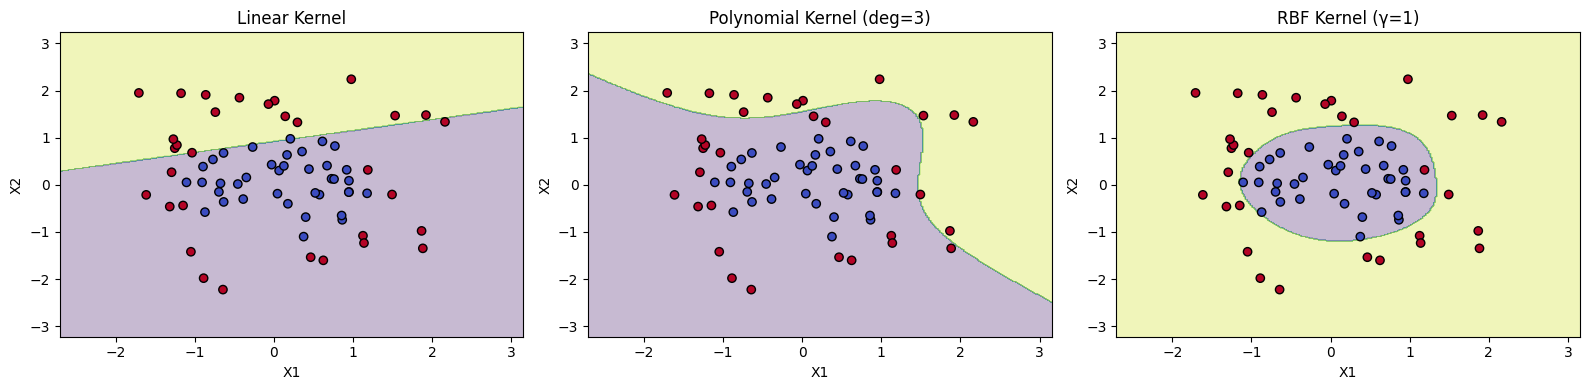

In [4]:
def plot_all_svms(models, titles, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    fig, axes = plt.subplots(1, len(models), figsize=(16, 4))
    
    for ax, model, title in zip(axes, models, titles):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.3)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
        ax.set_title(title)
        ax.set_xlabel("X1")
        ax.set_ylabel("X2")

    plt.tight_layout()
    plt.show()

models = [svm_linear, svm_poly, svm_rbf]
titles = ['Linear Kernel', 'Polynomial Kernel (deg=3)', 'RBF Kernel (γ=1)']

plot_all_svms(models, titles, X_train, y_train)

In [5]:
def print_errors(model, name):
    train_err = 1 - accuracy_score(y_train, model.predict(X_train))
    test_err = 1 - accuracy_score(y_test, model.predict(X_test))
    print(f"{name} - Train Error: {train_err:.2f}, Test Error: {test_err:.2f}")

print_errors(svm_linear, "Linear SVM")
print_errors(svm_poly, "Polynomial SVM (deg=3)")
print_errors(svm_rbf, "RBF SVM")

Linear SVM - Train Error: 0.24, Test Error: 0.37
Polynomial SVM (deg=3) - Train Error: 0.27, Test Error: 0.40
RBF SVM - Train Error: 0.01, Test Error: 0.03


## Question 5.

We have seen that we can ft an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

## Question 5a.

Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary
between them.

In [6]:
# generate data
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = (x1**2 - x2**2 > 0).astype(int)

# Add noise to avoid perfect separation and errors in logistic regression statsmodel
x1 += np.random.normal(scale=0.01, size=x1.shape)
x2 += np.random.normal(scale=0.001, size=x2.shape)


## Question 5b.

Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the yaxis.

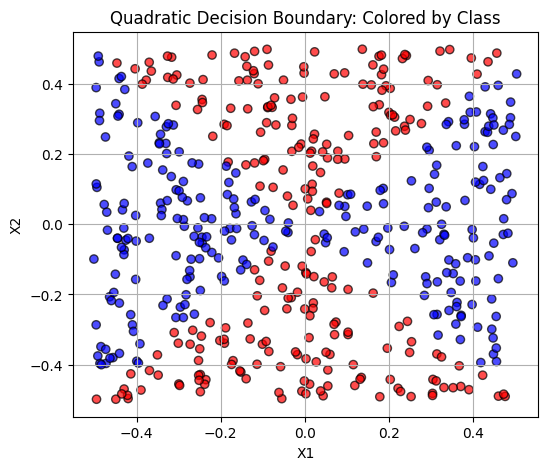

In [7]:
import matplotlib.pyplot as plt

# colors for 2 classes
colors = np.array(['red', 'blue'])

plt.figure(figsize=(6, 5))
plt.scatter(x1, x2, c=colors[y], edgecolor='k', alpha=0.7)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Quadratic Decision Boundary: Colored by Class')
plt.grid(True)
plt.show()

## Question 5c.

Fit a logistic regression model to the data, using X1 and X2 as predictors.

In [8]:
import statsmodels.api as sm
import pandas as pd
import statsmodels.formula.api as smf

# Create DataFrame for X1, X2, and y
df = pd.DataFrame({'X1': x1, 'X2': x2, 'y': y})

# Fit logistic regression using formula
logit_model = smf.logit('y ~ X1 + X2', data=df).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.692732
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  500
Model:                          Logit   Df Residuals:                      497
Method:                           MLE   Df Model:                            2
Date:                Mon, 05 May 2025   Pseudo R-squ.:               0.0004945
Time:                        20:53:29   Log-Likelihood:                -346.37
converged:                       True   LL-Null:                       -346.54
Covariance Type:            nonrobust   LLR p-value:                    0.8425
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0222      0.090      0.248      0.804      -0.153       0.198
X1            -0.1592      0.

## Question 5d.

Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The  decision boundary should be linear.

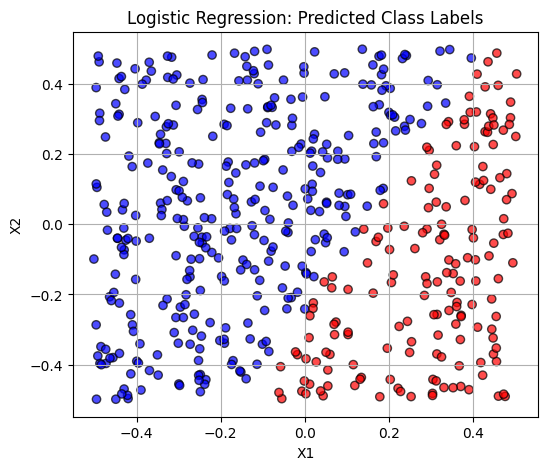

In [9]:
# predict class 
pred_probs = logit_model.predict(df[['X1', 'X2']])

# Classify label = 1 if prob > 0.5, else 0
y_pred = (pred_probs > 0.5).astype(int)

# Colors for predicted classes
colors = np.array(['red', 'blue'])

plt.figure(figsize=(6, 5))
plt.scatter(df['X1'], df['X2'], c=colors[y_pred], edgecolor='k', alpha=0.7)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression: Predicted Class Labels')
plt.grid(True)
plt.show()

## Question 5e.

Now ft a logistic regression model to the data using non-linear functions of X1 and X2 as predictors (e.g. X2 1, X1×X2, log(X2), and so forth).

In [10]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

# Original data
df = pd.DataFrame({
    'X1': x1,
    'X2': x2,
    'Y': y.astype(int),
    'X1_sq': x1**2,
    'X2_sq': x2**2
})

# Fit using only quadratic terms
model = smf.logit('Y ~ X1 + X2 + X1_sq + X2_sq', data=df).fit()
print(model.summary())

# departure from text and had to add noise to avoid LinAlgError: Singular matrix


Optimization terminated successfully.
         Current function value: 0.012972
         Iterations 27
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  500
Model:                          Logit   Df Residuals:                      495
Method:                           MLE   Df Model:                            4
Date:                Mon, 05 May 2025   Pseudo R-squ.:                  0.9813
Time:                        20:53:29   Log-Likelihood:                -6.4861
converged:                       True   LL-Null:                       -346.54
Covariance Type:            nonrobust   LLR p-value:                7.085e-146
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3938      0.913     -0.431      0.666      -2.184       1.396
X1            17.0400     10

## Question 5f.

Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)–(e) until you come up with an example in which the predicted class labels are obviously non-linear

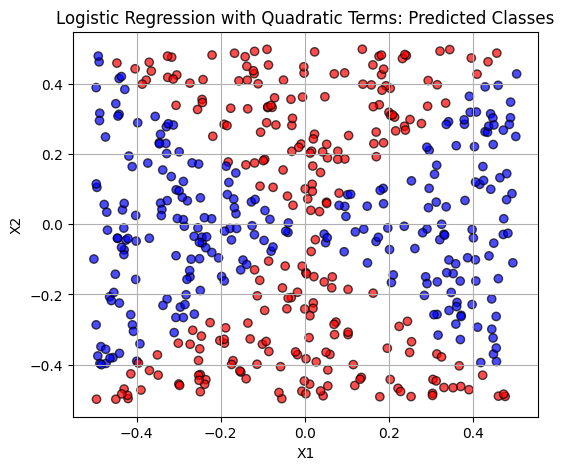

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Predict
pred_probs_nl = model.predict(df)

# Convert to class labels using 0.5 threshold
y_pred_nl = (pred_probs_nl > 0.5).astype(int)

# Plot
colors = np.array(['red', 'blue'])

plt.figure(figsize=(6, 5))
plt.scatter(df['X1'], df['X2'], c=colors[y_pred_nl], edgecolor='k', alpha=0.7)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Logistic Regression with Quadratic Terms: Predicted Classes")
plt.grid(True)
plt.show()


In [12]:
# Suspect...
matches = (y == y_pred_nl)
print(f"Predicted matches original: {matches.mean() * 100:.2f}%")

Predicted matches original: 99.20%


## Question 5g.

Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted  class labels.

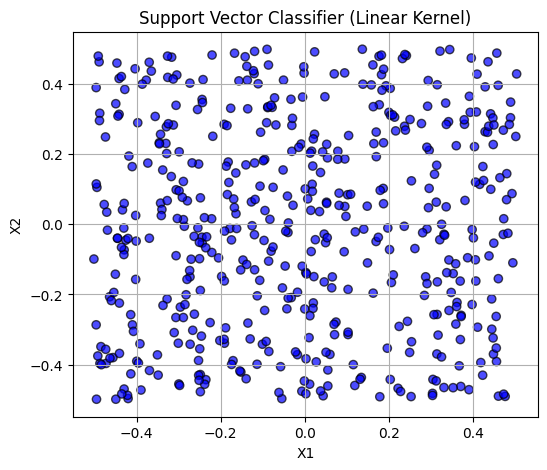

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

#  feature matrix from X1 and X2
X_linear = np.column_stack((x1, x2))

# Fit linear SVC
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_linear, y)

# predict class labels
y_pred_svc = svm_linear.predict(X_linear)

# Plot predicted classes
colors = np.array(['red', 'blue'])
plt.figure(figsize=(6, 5))
plt.scatter(x1, x2, c=colors[y_pred_svc], edgecolor='k', alpha=0.7)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Support Vector Classifier (Linear Kernel)")
plt.grid(True)
plt.show()


In [14]:
# every observation predicted as single class, suspicious again
unique, counts = np.unique(y_pred_svc, return_counts=True)
print(dict(zip(unique, counts)))


{1: 500}


## Question 5h.

Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

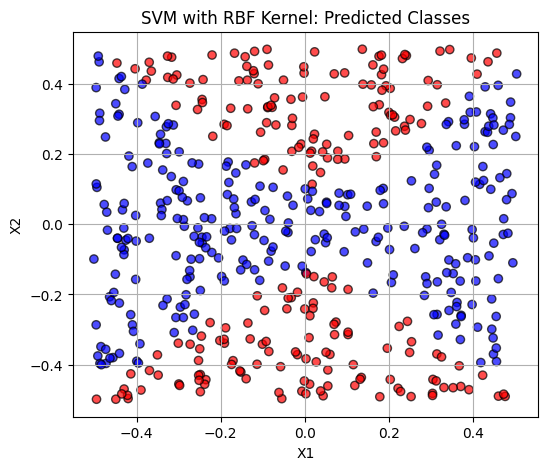

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Combine X1 and X2 into feature matrix
X_nl = np.column_stack((x1, x2))

# Fit SVM with RBF kernel for non-linear fit
svm_rbf = SVC(kernel='rbf', gamma=1, C=1)  # gamma=1 and C=1 are reasonable starting points
svm_rbf.fit(X_nl, y)

# Predict class labels
y_pred_rbf = svm_rbf.predict(X_nl)

# plot
colors = np.array(['red', 'blue'])
plt.figure(figsize=(6, 5))
plt.scatter(x1, x2, c=colors[y_pred_rbf], edgecolor='k', alpha=0.7)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("SVM with RBF Kernel: Predicted Classes")
plt.grid(True)
plt.show()


## Question 5i.

Print results and comment.

In [16]:
# Print training accuracy
correct = (y_pred_rbf == y).sum()
total = len(y)
print(f"Training Accuracy: {correct / total:.4f} ({correct}/{total} correct)")

# Show predicted class counts
print("Predicted Class Counts:")
for label in np.unique(y_pred_rbf):
    count = (y_pred_rbf == label).sum()
    print(f"  Class {label}: {count} observations")

# Show number of support vectors
print(f"Total Support Vectors: {svm_rbf.n_support_.sum()}")


Training Accuracy: 0.9480 (474/500 correct)
Predicted Class Counts:
  Class 0: 221 observations
  Class 1: 279 observations
Total Support Vectors: 326


RBF SVM succeeded in modeling the nonlinear boundary much better than the linear SVM, and nearly as well as the logistic regression from part (f). The large number of support vectors suggests it’s flexible but potentially overfitting slightly.

## Question 7.

In this problem, you will use support vector approaches in order to  predict whether a given car gets high or low gas mileage based on the  Auto data set.

In [17]:
from ISLP import load_data

# Load the Auto dataset
Auto = load_data('Auto')

# see the first few rows
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


## Question 7a.

Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median

In [18]:
import numpy as np

# Drop missing values
Auto = Auto.dropna()

# Compute median mpg
median_mpg = Auto['mpg'].median()

# Create binary variable: 1 = high mpg, 0 = low mpg
Auto['mpg_high'] = (Auto['mpg'] > median_mpg).astype(int)

# Confirm result
print(Auto[['mpg', 'mpg_high']].head())
print("Class distribution:")
print(Auto['mpg_high'].value_counts())


                            mpg  mpg_high
name                                     
chevrolet chevelle malibu  18.0         0
buick skylark 320          15.0         0
plymouth satellite         18.0         0
amc rebel sst              16.0         0
ford torino                17.0         0
Class distribution:
mpg_high
0    196
1    196
Name: count, dtype: int64


## Question 7b.

Fit a support vector classifier to the data with various values of C, in order to predict whether a car gets high or low gas mileage Report the cross-validation errors associated with different values of this parameter. Comment on your results. Note you will need to ft the classifier without the gas mileage variable to produce sensible results.

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# fix index
# Auto = Auto.reset_index(drop=True)

# Drop mpg and name (non-numeric), and drop rows with missing values
df = Auto.drop(columns=['mpg'])

# Separate features and target
X = df.drop(columns=['mpg_high'])
y = df['mpg_high']

# Standardize numeric features??
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different values of C
C_values = [0.01, 0.1, 1, 10, 100]
cv_errors = []

for C in C_values:
    model = SVC(kernel='linear', C=C)
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    error = 1 - scores.mean()
    cv_errors.append(error)
    print(f"C={C:>6} | CV Error: {error:.4f}")


C=  0.01 | CV Error: 0.0996
C=   0.1 | CV Error: 0.1249
C=     1 | CV Error: 0.1477
C=    10 | CV Error: 0.1426
C=   100 | CV Error: 0.1426


THe lowest cross-validation error occurs at C = 0.01, meaning a "softer" decision boundary works best for this dataset.

## Question 7c.

Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and  C. Comment on your results.

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# RBF
print("RBF Kernel Cross-Validation Results")
for gamma in [0.01, 0.1, 1]:
    for C in [0.1, 1, 10]:
        model = SVC(kernel='rbf', gamma=gamma, C=C)
        scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
        error = 1 - scores.mean()
        print(f"RBF | gamma={gamma:<4} C={C:<4} | CV Error: {error:.4f}")

# poly
print("\nPolynomial Kernel Cross-Validation Results")
for degree in [2, 3, 4]:
    for C in [0.1, 1, 10]:
        model = SVC(kernel='poly', degree=degree, C=C)
        scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
        error = 1 - scores.mean()
        print(f"Poly | degree={degree:<4} C={C:<4} | CV Error: {error:.4f}")


RBF Kernel Cross-Validation Results
RBF | gamma=0.01 C=0.1  | CV Error: 0.1202
RBF | gamma=0.01 C=1    | CV Error: 0.0996
RBF | gamma=0.01 C=10   | CV Error: 0.1326
RBF | gamma=0.1  C=0.1  | CV Error: 0.0945
RBF | gamma=0.1  C=1    | CV Error: 0.1377
RBF | gamma=0.1  C=10   | CV Error: 0.1988
RBF | gamma=1    C=0.1  | CV Error: 0.0944
RBF | gamma=1    C=1    | CV Error: 0.1349
RBF | gamma=1    C=10   | CV Error: 0.1808

Polynomial Kernel Cross-Validation Results
Poly | degree=2    C=0.1  | CV Error: 0.4537
Poly | degree=2    C=1    | CV Error: 0.3364
Poly | degree=2    C=10   | CV Error: 0.2521
Poly | degree=3    C=0.1  | CV Error: 0.2252
Poly | degree=3    C=1    | CV Error: 0.1805
Poly | degree=3    C=10   | CV Error: 0.1346
Poly | degree=4    C=0.1  | CV Error: 0.3396
Poly | degree=4    C=1    | CV Error: 0.4024
Poly | degree=4    C=10   | CV Error: 0.2796


I tested several SVM models to classify cars as high or low gas mileage. The linear SVM did surprisingly well, achieving a cross-validation error of 9.96% at C = 0.01. The **RBF kernel** performed slightly better, with the lowest error of 9.44% using *gamma = 0.1 and C = 0.1, suggesting that a moderately flexible boundary with a soft margin captured the underlying pattern best. The polynomial kernel didn’t perform as well overall — its best result was 13.46% error at degree = 3 and C = 10, but other combinations either underfit or overfit. In the end, the RBF kernel was most accurate, though the linear SVM was nearly as effective with proper tuning.


## Question 7d.

Make some plots to back up your assertions in (b) and (c).

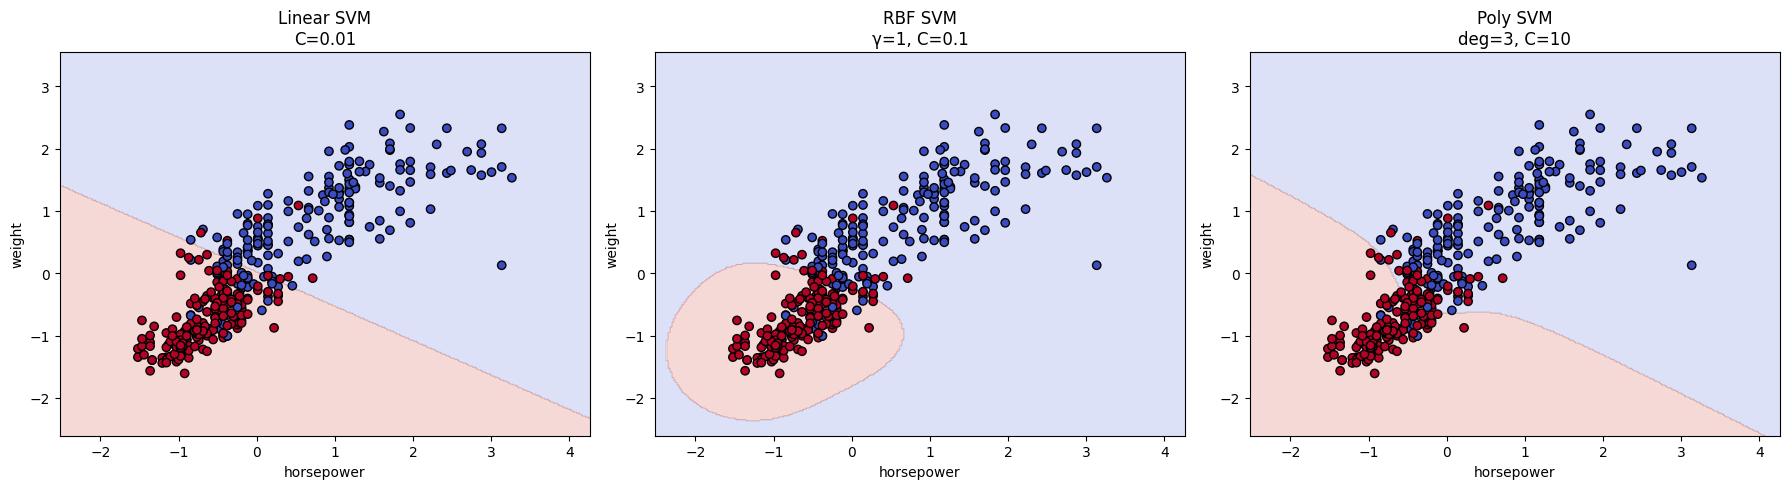

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Have to reduce to 2 features to plot?? or dimension reduction? 
features = ['horsepower', 'weight']
X2 = Auto[features].values

# scale
X2_scaled = StandardScaler().fit_transform(X2)

# Train the three best models on this 2-D data
models = {
    'Linear': SVC(kernel='linear', C=best_C_linear).fit(X2_scaled, y),
    'RBF':    SVC(kernel='rbf',    gamma=best_gamma, C=best_C_rbf).fit(X2_scaled, y),
    'Poly':   SVC(kernel='poly',   degree=best_degree, C=best_C_poly).fit(X2_scaled, y)
}

# Make a mesh grid in feature-space
x_min, x_max = X2_scaled[:,0].min() - 1, X2_scaled[:,0].max() + 1
y_min, y_max = X2_scaled[:,1].min() - 1, X2_scaled[:,1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Plot each decision boundary
## Cite ChatGPT here, I could not get the textbook methods to render
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, model) in zip(axes, models.items()):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    ax.scatter(X2_scaled[:,0], X2_scaled[:,1],
               c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_title(f"{name} SVM\n" +
                 (f"C={best_C_linear}" if name=='Linear' else
                  f"γ={best_gamma}, C={best_C_rbf}" if name=='RBF' else
                  f"deg={best_degree}, C={best_C_poly}"))
plt.tight_layout()
plt.show()


## Question 8.

This problem involves the OJ data set which is part of the ISLP package

In [25]:
# Load the OJ data
OJ = load_data('OJ')

# Quick sanity checks
print("Shape:", OJ.shape)
OJ.head()

Shape: (1070, 18)


,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


## Question 8a.

Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [27]:
from sklearn.model_selection import train_test_split

# Split into training (800 obs) and test (remaining)
train, test = train_test_split(OJ, train_size=800, random_state=42)

print(f"Training set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

# show
train.head()


Training set shape: (800, 18)
Test set shape: (270, 18)


,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
323,CH,271,3,1.99,2.09,0.1,0.4,1,0,0.400000,1.69,1.89,-0.20,No,0.191388,0.050251,0.10,3
261,CH,270,2,1.86,2.18,0.0,0.0,0,0,0.307200,2.18,1.86,0.32,No,0.000000,0.000000,0.32,2
974,MM,244,1,1.86,2.09,0.0,0.0,0,0,0.251966,2.09,1.86,0.23,No,0.000000,0.000000,0.23,1
1031,CH,269,4,1.99,2.09,0.1,0.0,0,0,0.924580,2.09,1.89,0.20,No,0.000000,0.050251,0.10,4
528,CH,250,2,1.89,2.09,0.0,0.0,0,0,0.744000,2.09,1.89,0.20,No,0.000000,0.000000,0.20,2


## Question 8b.

Fit a support vector classifier to the training data using `C = 0.01`, with Purchase as the response and the other variables as predictors. How many support points are there?

In [29]:
from ISLP import load_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd

# Prepare training data
X_train = pd.get_dummies(train.drop('Purchase', axis=1), drop_first=True)
y_train = train['Purchase']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit SVC with linear kernel and C=0.01
svc = SVC(kernel='linear', C=0.01)
svc.fit(X_train_scaled, y_train)

# Number of support points
support_per_class = svc.n_support_
total_support = svc.support_.shape[0]

print("Support vectors per class:", support_per_class)
print("Total number of support points:", total_support)


Support vectors per class: [215 215]
Total number of support points: 430


## Question 8c.

What are the training and test error rates?

In [30]:
import numpy as np
import pandas as pd

X_train_d = pd.get_dummies(X_train, drop_first=True)
X_train_scaled = scaler.transform(X_train_d)
y_train_pred = svc.predict(X_train_scaled)

train_error = np.mean(y_train_pred != y_train)
print(f"Training error rate: {train_error:.3f}")

# 2) Compute test error
X_test = test.drop('Purchase', axis=1)
X_test_d = pd.get_dummies(X_test, drop_first=True)

# align test dummies to train columns (fill missing with 0)
X_test_d = X_test_d.reindex(columns=X_train_d.columns, fill_value=0)
X_test_scaled = scaler.transform(X_test_d)
y_test_pred = svc.predict(X_test_scaled)

test_error = np.mean(y_test_pred != test['Purchase'])
print(f"Test error rate:     {test_error:.3f}")


Training error rate: 0.160
Test error rate:     0.196


## Question 8d.

Use cross-validation to select an optimal C. Consider values in the range 0.01 to 10.

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from ISLP import load_data
from sklearn.model_selection import train_test_split

# Cross‐validate over C 0.01, 0.1, 1, 10
C_vals = [0.01, 0.1, 1, 10]
cv_acc  = []
for C in C_vals:
    svc = SVC(kernel='linear', C=C)
    scores = cross_val_score(svc, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_acc.append(scores.mean())

# Pick the best C
best_idx = np.argmax(cv_acc)
best_C   = C_vals[best_idx]

# results
print("C values: ", C_vals)
print("5 fold CV accuracies:", [f"{acc:.6f}" for acc in cv_acc])
print(f"Optimal C = {best_C}, with CV accuracy = {cv_acc[best_idx]:.6f}")


C values:  [0.01, 0.1, 1, 10]
5 fold CV accuracies: ['0.832500', '0.836250', '0.837500', '0.837500']
Optimal C = 1, with CV accuracy = 0.837500


## Question 8e.

Compute the training and test error rates using this new value for C.

In [35]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC

# Train with optimal C 
svc_best = SVC(kernel='linear', C=best_C)
svc_best.fit(X_train_scaled, y_train)

# compute training error
y_train_pred = svc_best.predict(X_train_scaled)
train_error = np.mean(y_train_pred != y_train)
print(f"Training error rate (C={best_C}): {train_error:.3f}")

# prepare & scale test
X_test_dummies = pd.get_dummies(X_test, drop_first=True)
# align dummy columns to training set
X_test_dummies = X_test_dummies.reindex(columns=X_train.columns, fill_value=0)
X_test_scaled = scaler.transform(X_test_dummies)

# Compute test error
y_test_pred = svc_best.predict(X_test_scaled)
test_error = np.mean(y_test_pred != test['Purchase'])
print(f"Test error rate  (C={best_C}): {test_error:.3f}")


Training error rate (C=1): 0.150
Test error rate  (C=1): 0.207


## Question 8f

Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma.

In [ ]:
from ISLP import load_data
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import pandas as pd

# load and split
OJ    = load_data('OJ')
train, test = train_test_split(OJ, train_size=800, random_state=42)

# encode & scale
X_train = pd.get_dummies(train.drop('Purchase', axis=1), drop_first=True)
y_train = train['Purchase']
X_test  = pd.get_dummies(test.drop('Purchase', axis=1), drop_first=True)\
              .reindex(columns=X_train.columns, fill_value=0)
y_test  = test['Purchase']

scaler = StandardScaler().fit(X_train)
X_tr  = scaler.transform(X_train)
X_te  = scaler.transform(X_test)

# fit RBF SVM with C=0.01
svc = SVC(kernel='rbf', C=0.01)
svc.fit(X_tr, y_train)
print("Support vectors per class:", svc.n_support_)
print("Total support vectors:", len(svc.support_))

# training & test error
train_err = np.mean(svc.predict(X_tr) != y_train)
test_err  = np.mean(svc.predict(X_te) != y_test)
print("Training error rate:", train_err)
print("Test error rate:    ", test_err)

# CV to pick C
C_vals = [0.01, 0.1, 1, 10]
cv_scores = [cross_val_score(SVC(kernel='rbf', C=C), X_tr, y_train, cv=5, scoring='accuracy').mean()
             for C in C_vals]
best_C = C_vals[np.argmax(cv_scores)]
print("Best C:", best_C)

# retrain & compute error with best C
svc_best = SVC(kernel='rbf', C=best_C)
svc_best.fit(X_tr, y_train)
print("Train error (best C):", np.mean(svc_best.predict(X_tr) != y_train))
print("Test error  (best C):", np.mean(svc_best.predict(X_te) != y_test))

Support vectors per class: [311 306]
Total support vectors: 617
Training error rate: 0.3825
Test error rate:     0.4111111111111111
Best C: 1
Train error (best C): 0.14625
Test error  (best C): 0.18888888888888888


## Question 8g. 

Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree = 2.

In [37]:
# polynomial 

# encode & scale
X_train = pd.get_dummies(train.drop('Purchase', axis=1), drop_first=True)
y_train = train['Purchase']
X_test = pd.get_dummies(test.drop('Purchase', axis=1), drop_first=True) \
             .reindex(columns=X_train.columns, fill_value=0)
y_test = test['Purchase']

scaler = StandardScaler().fit(X_train)
X_tr = scaler.transform(X_train)
X_te = scaler.transform(X_test)

# fit poly SVM, degree=2, C=0.01
svc = SVC(kernel='poly', degree=2, C=0.01)
svc.fit(X_tr, y_train)
print("Support vectors per class:", svc.n_support_)
print("Total support vectors:   ", len(svc.support_))

# training & test error
train_err = np.mean(svc.predict(X_tr) != y_train)
test_err  = np.mean(svc.predict(X_te) != y_test)
print("Training error rate:", train_err)
print("Test error rate:   ", test_err)

# (d) CV to pick C
C_vals = [0.01, 0.1, 1, 10]
cv_scores = [
    cross_val_score(SVC(kernel='poly', degree=2, C=C),
                    X_tr, y_train, cv=5, scoring='accuracy').mean()
    for C in C_vals
]
best_C = C_vals[np.argmax(cv_scores)]
print("Best C:", best_C)

# retrain & compute error
svc_best = SVC(kernel='poly', degree=2, C=best_C)
svc_best.fit(X_tr, y_train)
print("Train error (best C):", np.mean(svc_best.predict(X_tr) != y_train))
print("Test error  (best C):", np.mean(svc_best.predict(X_te) != y_test))


Support vectors per class: [312 306]
Total support vectors:    618
Training error rate: 0.3675
Test error rate:    0.4074074074074074
Best C: 10
Train error (best C): 0.19625
Test error  (best C): 0.24444444444444444


## Question 8f.

which approach seems to give the best results on this data?

For OJ data split, the RBF kernel with C=1 is the best choice as it minimizes test‐set misclassification rate.